In [1]:
!pip install -r https://raw.githubusercontent.com/datamllab/automl-in-action-notebooks/master/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.2 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0r

## Load data


In [2]:
from sklearn.datasets import fetch_20newsgroups

news_train = fetch_20newsgroups(subset="train", shuffle=True, random_state=42)
news_test = fetch_20newsgroups(subset="test", shuffle=True, random_state=42)


## Exploratory data analysis


In [3]:
doc_train, label_train = news_train.data, news_train.target
doc_test, label_test = news_test.data, news_test.target

print("The number of documents for training: {}.".format(len(doc_train)))
print("The number of documents for testing: {}.\n".format(len(doc_test)))

import numpy as np

print(
    "Unique labels {}. \nNumber of unique labels: {}.\n\n".format(
        np.unique(label_train), len(np.unique(label_train))
    )
)

print(type(doc_train[0]))
print("\nThe first training document:\n\n{}".format(doc_train[0]))


The number of documents for training: 11314.
The number of documents for testing: 7532.

Unique labels [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]. 
Number of unique labels: 20.


<class 'str'>

The first training document:

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







## Data preprocessing &  feature engineering


In [4]:
# Tokenization
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
X_train_counts = count_vec.fit_transform(doc_train)
X_train_counts.shape


(11314, 130107)

In [5]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape


(11314, 130107)

## Build up a logistic regression classfier & a Naive Bayes classifier


### logistic regression classfier


In [7]:
# Train
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(multi_class="ovr", random_state=42)
lr_clf.fit(X_train_tfidf, label_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=42)

In [8]:
# Test
from sklearn.metrics import accuracy_score

X_test_counts = count_vec.transform(doc_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
label_pred_test = lr_clf.predict(X_test_tfidf)

lr_acc = accuracy_score(label_test, label_pred_test)
print("Test accuracy: {:.2f} %".format(lr_acc * 100))


# Display the testing results


Test accuracy: 82.54 %


In [9]:
%matplotlib inline


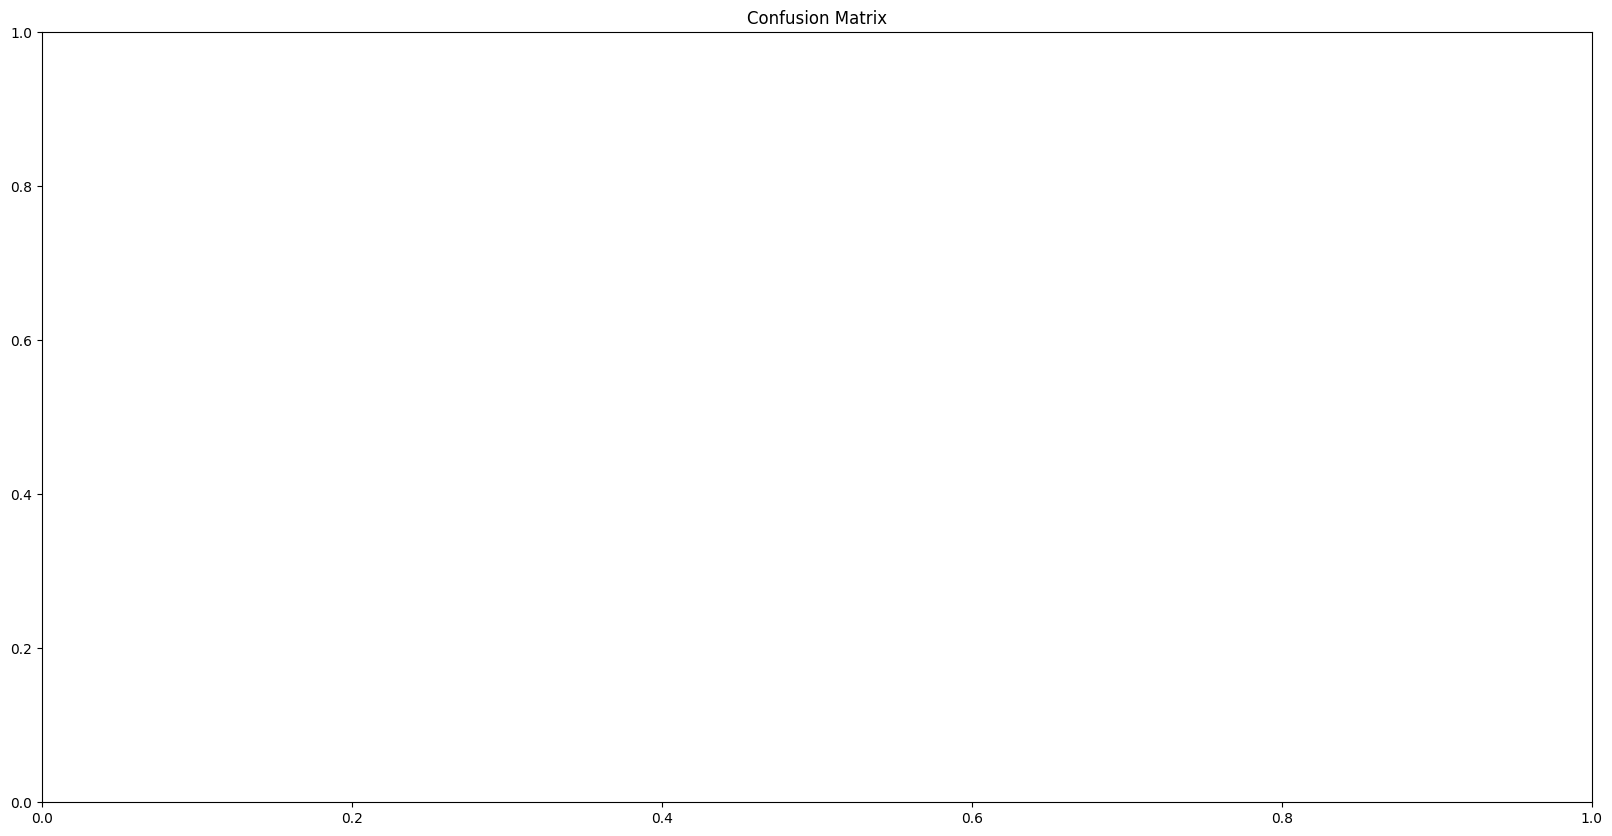

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(label_test, label_pred_test, labels=lr_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_clf.classes_)
plt.figure(figsize=(20, 10))

plt.title(label="Confusion Matrix")
plt.show()


### Naive Bayes classifier


In [11]:
# Train
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB().fit(X_train_tfidf, label_train)


Test accuracy: 77.39 %


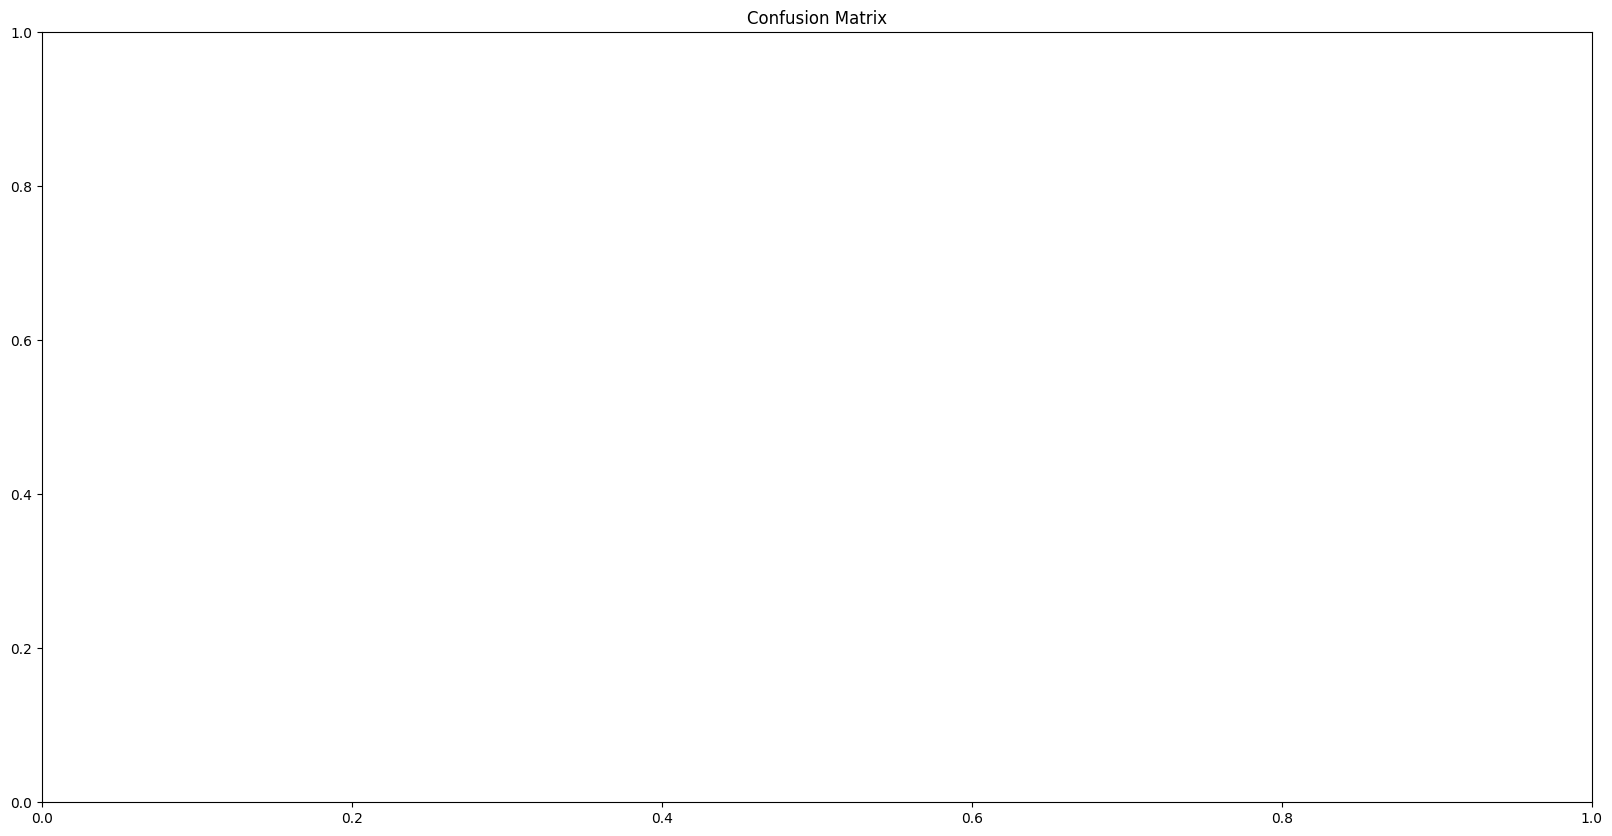

In [12]:
# Test
X_test_counts = count_vec.transform(doc_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
label_pred_test = nb_clf.predict(X_test_tfidf)

lr_acc = accuracy_score(label_test, label_pred_test)
print("Test accuracy: {:.2f} %".format(lr_acc * 100))

# Display the testing results
cm = confusion_matrix(label_test, label_pred_test, labels=nb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_clf.classes_)

plt.figure(figsize=(20, 10))
plt.title(label="Confusion Matrix")
plt.show()


### Build a pipeline


## Fine-Tuning: jointly tune three hyperparameters of the whole pipepline


In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline


# Build up the decision tree regressor
text_clf = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", MultinomialNB()),
    ]
)

# Create a dictionary for all the hyperparameters
hps = {
    "vect__ngram_range": [(1, 1), (1, 2)],
    "tfidf__use_idf": (True, False),
    "clf__alpha": (1, 1e-1, 1e-2),
}

# Transform the performance_metric into a scoring function using 'make_scorer'.
scoring_fnc = make_scorer(accuracy_score)

# Create the grid search cv object (3-fold cross-validation)
grid_search = GridSearchCV(
    estimator=text_clf, param_grid=hps, scoring=scoring_fnc, cv=3, verbose=5, n_jobs=-1
)

# Fit the grid search object to the training data to search the optimal model
grid_search = grid_search.fit(doc_train, label_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [14]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)


0.830033045064289 {'clf__alpha': 1, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
0.8379879321258711 {'clf__alpha': 1, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}
0.7380238708478192 {'clf__alpha': 1, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}
0.7374931794698597 {'clf__alpha': 1, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}
0.8926992932894983 {'clf__alpha': 0.1, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
0.8920804423706096 {'clf__alpha': 0.1, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}
0.8565492649668981 {'clf__alpha': 0.1, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}
0.8584935085800652 {'clf__alpha': 0.1, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}
0.9045429487880711 {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
0.9068408616706969 {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}
0.8950858343974814 {'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range

## Retrive the best model


In [15]:
grid_search.best_params_
best_pipeline = grid_search.best_estimator_

# Produce the value for 'max_depth'
print("The best combination of hyperparameters are:")

for hp_name in sorted(hps.keys()):
    print("%s: %r" % (hp_name, grid_search.best_params_[hp_name]))

best_pipeline.fit(doc_train, label_train)

# Model prediction on training & test data
label_pred_train = best_pipeline.predict(doc_train)
label_pred_test = best_pipeline.predict(doc_test)

# Display the testing results
train_acc = accuracy_score(label_train, label_pred_train)
test_acc = accuracy_score(label_test, label_pred_test)
print("\nThe prediction accuracy on training set: {:.2f} %".format(train_acc * 100))
print("The prediction accuracy on test set: {:.2f} %".format(test_acc * 100))


The best combination of hyperparameters are:
clf__alpha: 0.01
tfidf__use_idf: True
vect__ngram_range: (1, 2)

The prediction accuracy on training set: 99.92 %
The prediction accuracy on test set: 83.44 %


In [16]:
train_acc = accuracy_score(label_train, label_pred_train)
test_acc = accuracy_score(label_test, label_pred_test)
print("Training Accuracy: {:.2f} %".format(train_acc * 100))
print("Test Accuracy: {:.2f} %".format(test_acc * 100))


Training Accuracy: 99.92 %
Test Accuracy: 83.44 %
